# Outlier and Missing Value Study on Pima Indians Diabetes Dataset
### I'll perform an analysis of the Pima Indians Diabetes dataset to identify outliers and missing values. This dataset contains medical information     about Pima Indian women and whether they developed diabetes.
[Download the dataset](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

## The Followings tasks I'm going to perform : 
### 1. Data Loading & Preparation.
### 2. Missing Value Handling(Mean Imputation).
### 3. Outlier Analysis(IQR-based detection ).
### 4. Data Quality Assessment ( Outlier Data).
### 5. Visualization of the Data using Data distributions (Original vs Imputed).
### 6. Comparing the Original and Imputed Dataset ( Statastical Measures ). 

# 1. Data Loading & Preparation

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('diabetes.csv')

In [6]:
df #Original data-set.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
df.describe() #Statastical Values of the given Dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 2. Missing Value Handling(Mean Imputation).

In [9]:
# Replace zeros with NaN in relevant columns
cols_with_missing = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction','Age']
for col in cols_with_missing:
    df[col] = df[col].replace(0, np.nan)

In [10]:
# Calculate means for each column (excluding missing values)
column_means = df[cols_with_missing].mean()

# Impute missing values with means
df_imputed = df.copy()
for col in cols_with_missing:
    # Better way to handle inplace operation to avoid FutureWarning
    df_imputed.loc[:, col] = df_imputed[col].fillna(column_means[col])

# Verify no missing values remain
print("Missing values after imputation:")
df_imputed.isnull().sum()

Missing values after imputation:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df_imputed #Imputed Dataset 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2.000000,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5.000000,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1.000000,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [12]:
print("\nImputed Data ( Statastical Measures):")
df_imputed.describe()


Imputed Data ( Statastical Measures):


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.494673,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,2.975395,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,4.494673,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 3. Outlier Analysis(IQR-based detection).


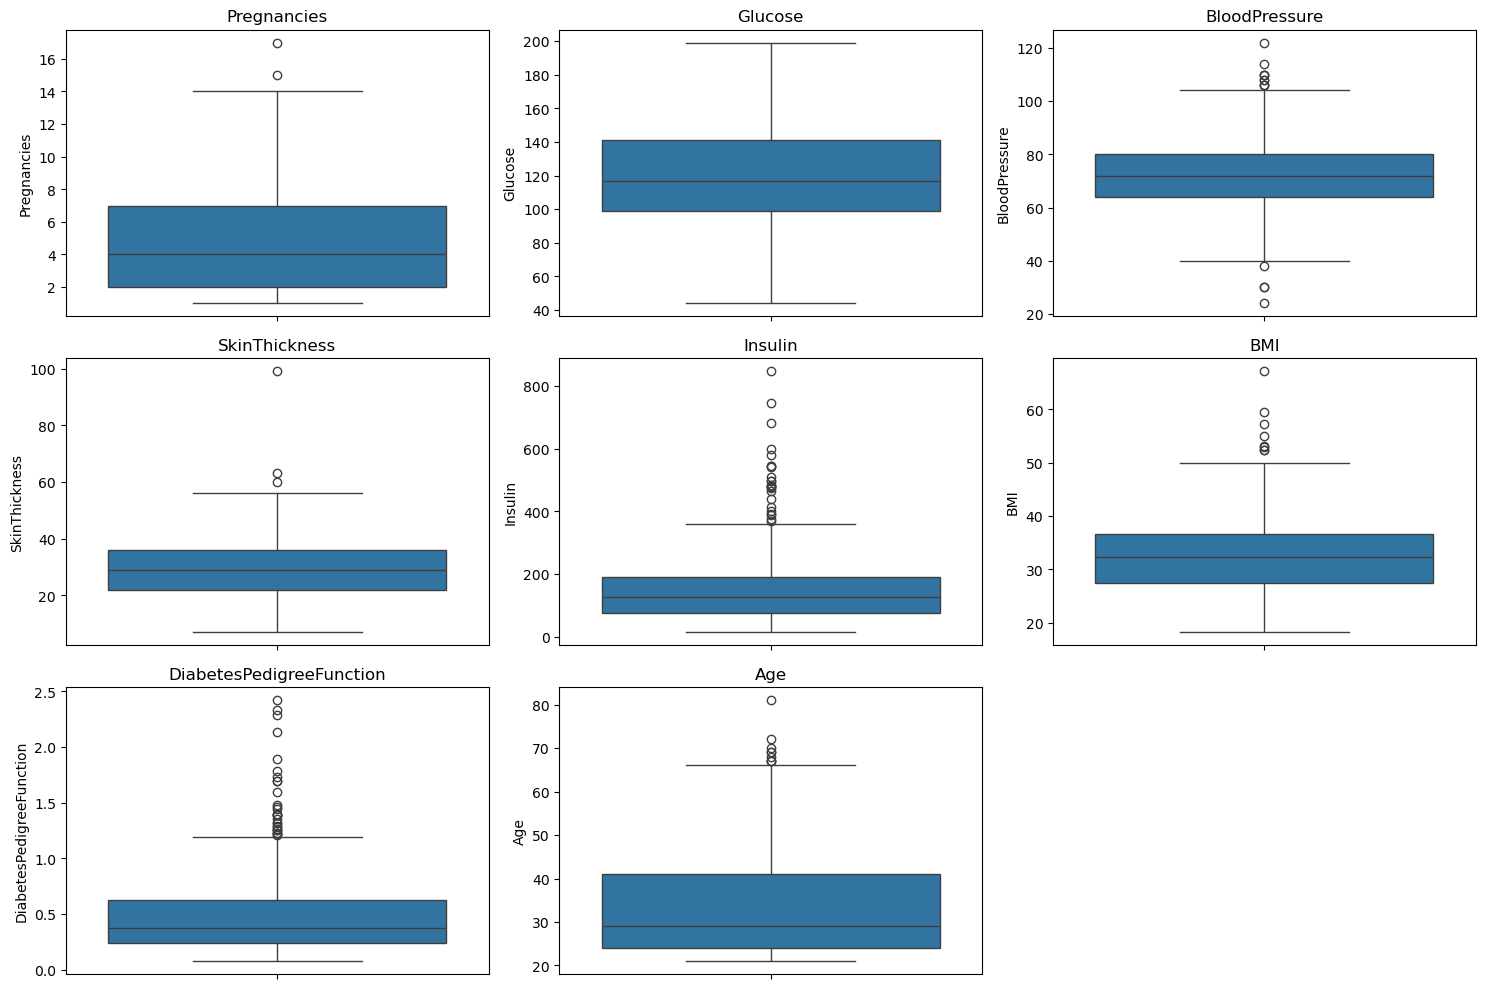

In [14]:
# Function to detect outliers
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (series < lower_bound) | (series > upper_bound)

# Plot boxplots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):  # Exclude Outcome
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# 4. Data Quality Assessment ( Outlier Data).


In [16]:
# Detect outliers in imputed data
outlier_counts_imputed = {}
for col in df_imputed.columns[:-1]:  # exclude Outcome
    outlier_counts_imputed[col] = detect_outliers(df_imputed[col]).sum()

# Simple direct conversion to DataFrame
outlier_df = pd.DataFrame({
    'Feature': list(outlier_counts_imputed.keys()),
    'Outlier_Count': list(outlier_counts_imputed.values())
})
outlier_df['Outlier_Percentage'] = (outlier_df['Outlier_Count']/len(df_imputed)*100).round(2)

In [17]:
print("\nOutlier Count and Percentage after Imputation :")
outlier_df


Outlier Count and Percentage after Imputation :


,Feature,Outlier_Count,Outlier_Percentage
0,Pregnancies,14,1.82
1,Glucose,0,0.00
2,BloodPressure,14,1.82
3,SkinThickness,87,11.33
4,Insulin,164,21.35
5,BMI,8,1.04
6,DiabetesPedigreeFunction,29,3.78
7,Age,9,1.17


# 5. Visualization of the Data using Data distributions (Original vs Imputed).

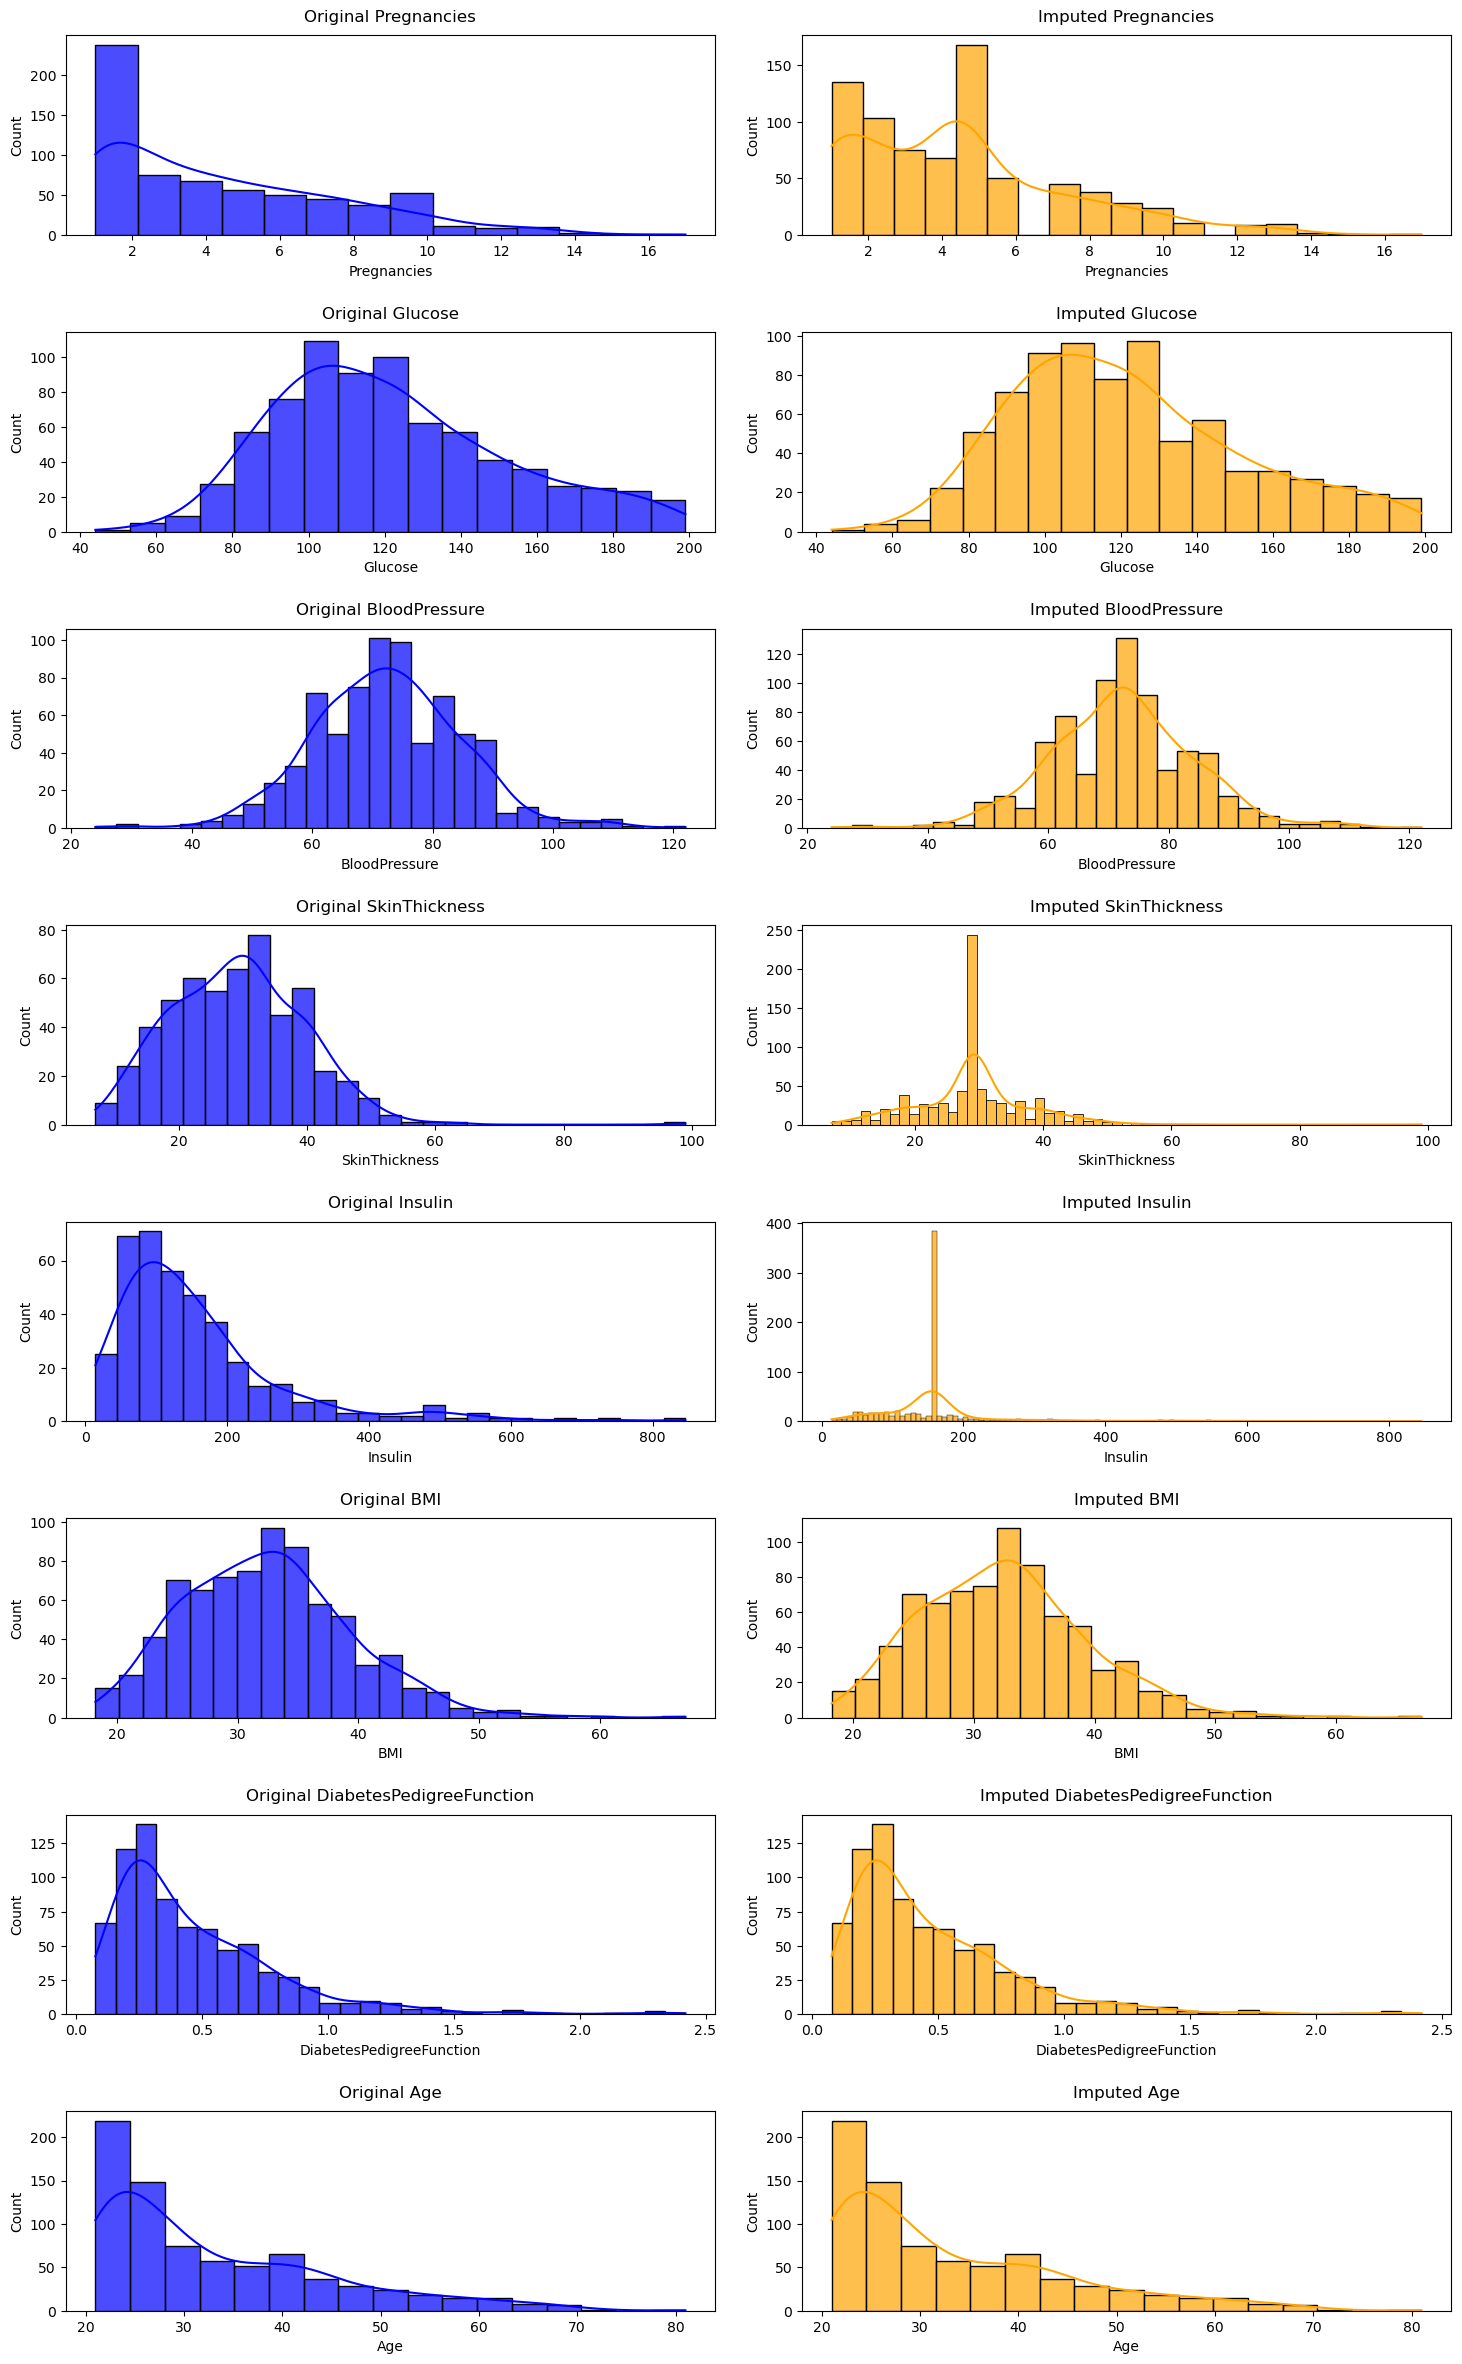

In [19]:
# Calculate required rows (8 columns means 8 pairs of plots)
n_rows = len(cols_with_missing)  # 8 rows needed (1 row per feature pair)

# Plot comparison of original vs imputed distributions
plt.figure(figsize=(15, 3*n_rows))  # Dynamic height based on number of features
for i, col in enumerate(cols_with_missing):
    # Original data (with missing)
    plt.subplot(n_rows, 2, 2*i+1)
    sns.histplot(df[col].dropna(), kde=True, color='blue', alpha=0.7)
    plt.title(f'Original {col}', pad=10)
    
    # Imputed data
    plt.subplot(n_rows, 2, 2*i+2)
    sns.histplot(df_imputed[col], kde=True, color='orange', alpha=0.7)
    plt.title(f'Imputed {col}', pad=10)
    
plt.tight_layout(pad=2.0)
plt.show()    

# 6. Comparing the Original and Imputed Dataset( Statastical Measures). 

In [21]:
print("\nOriginal Data Dataframe(Statastical Measures):")
display(df.describe())
print("\nImputed Data Dataframe(Statastical Measures):")
df_imputed.describe()


Original Data Dataframe(Statastical Measures):


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,657.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,4.494673,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.217291,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,4.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,7.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



Imputed Data Dataframe(Statastical Measures):


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.494673,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,2.975395,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,4.494673,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


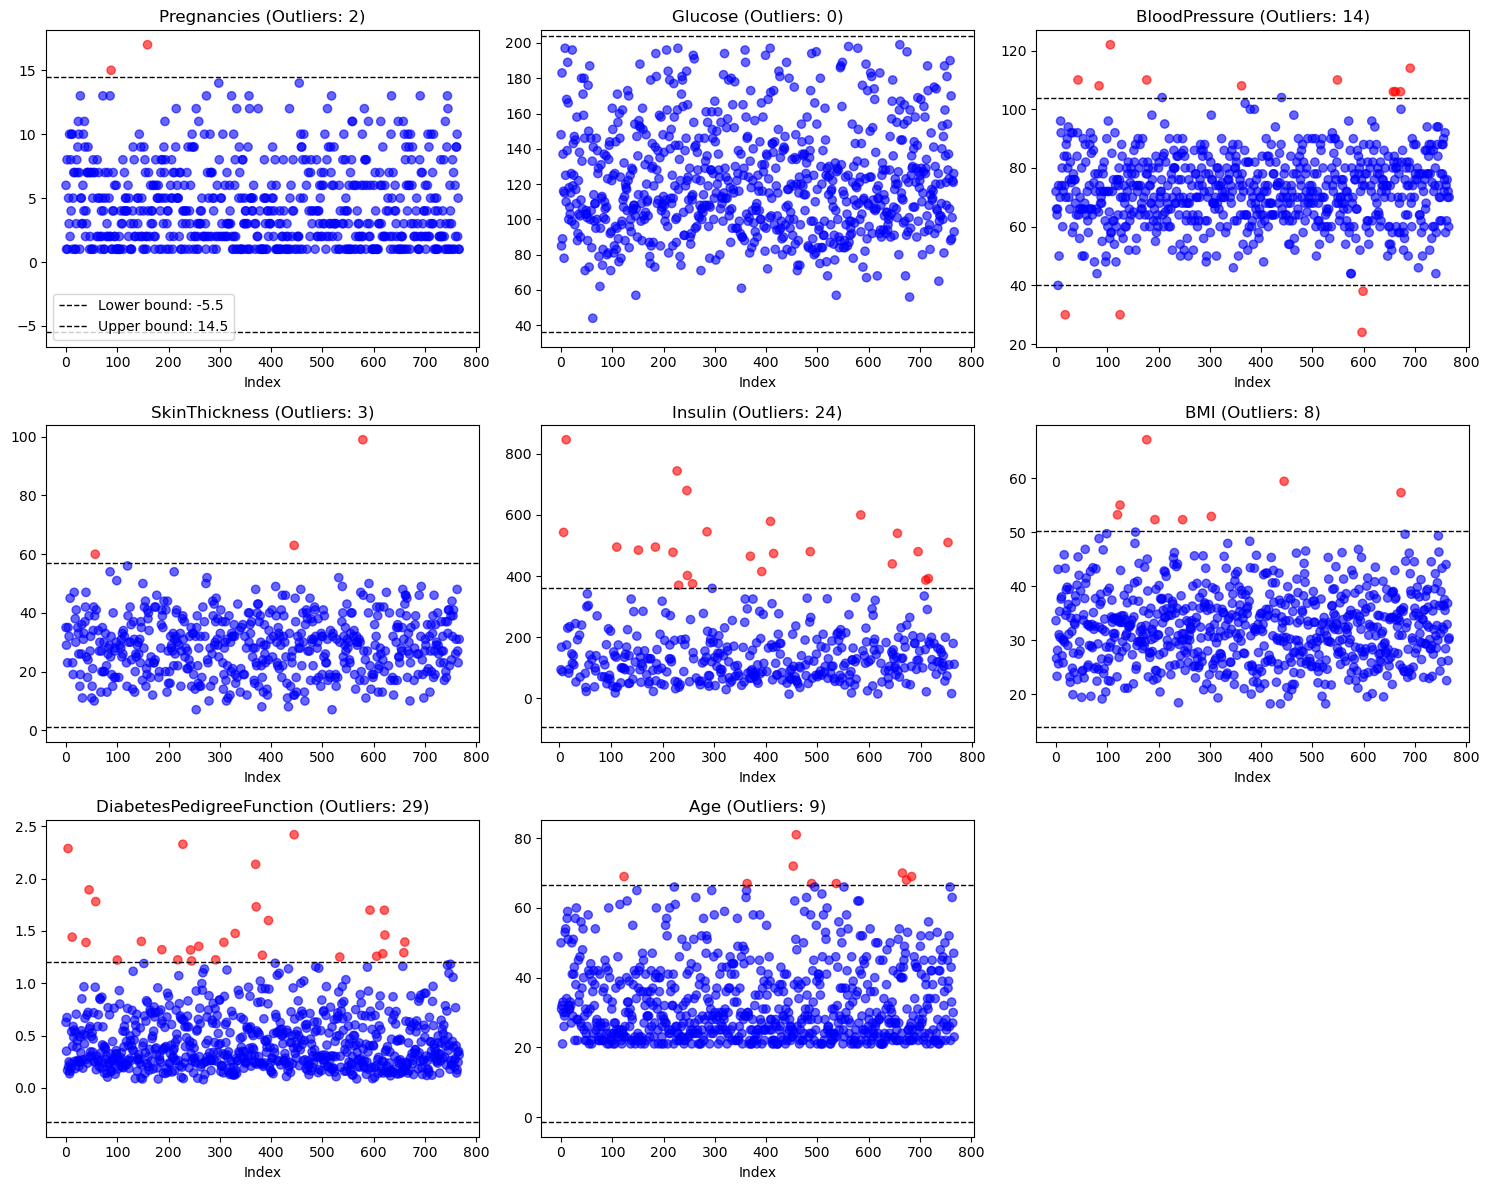

In [40]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(df.columns[:-1]):  # Skip Outcome column
    plt.subplot(3, 3, i+1)
    
    # Calculate bounds
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    # Identify outliers
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    
    # Plot all points (normal in blue, outliers in red)
    plt.scatter(x=df.index, y=df[col], 
               c=np.where(outliers, 'red', 'blue'), 
               alpha=0.6)
    
    # Add bound lines
    plt.axhline(lower_bound, color='black', linestyle='--', linewidth=1, label=f'Lower bound: {lower_bound:.1f}')
    plt.axhline(upper_bound, color='black', linestyle='--', linewidth=1, label=f'Upper bound: {upper_bound:.1f}')
    
    plt.title(f'{col} (Outliers: {sum(outliers)})')
    plt.xlabel('Index')
    
    if i == 0:  # Only show legend in first plot
        plt.legend()

plt.tight_layout()
plt.show()

ValueError: too many values to unpack (expected 3)

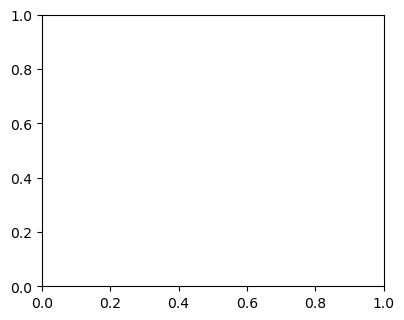

In [42]:
# Create scatter plots with outlier bounds
plt.figure(figsize=(15, 12))
for i, col in enumerate(df_imputed.columns[:-1]):  # Skip Outcome column
    plt.subplot(3, 3, i+1)
    
    # Detect outliers and get bounds
    outliers, lower_bound, upper_bound = detect_outliers(df_imputed[col])
    
    # Plot all points (normal in blue, outliers in red)
    plt.scatter(x=df_imputed.index, y=df_imputed[col], 
               c=np.where(outliers, 'red', 'blue'), 
               alpha=0.6)
    
    # Add bound lines
    plt.axhline(lower_bound, color='black', linestyle='--', linewidth=1, 
                label=f'Lower: {lower_bound:.1f}')
    plt.axhline(upper_bound, color='black', linestyle='--', linewidth=1, 
                label=f'Upper: {upper_bound:.1f}')
    
    plt.title(f'{col}\nOutliers: {sum(outliers)}')
    plt.xlabel('Index')
    
    if i == 0:  # Only show legend in first plot
        plt.legend()

plt.tight_layout()
plt.show()

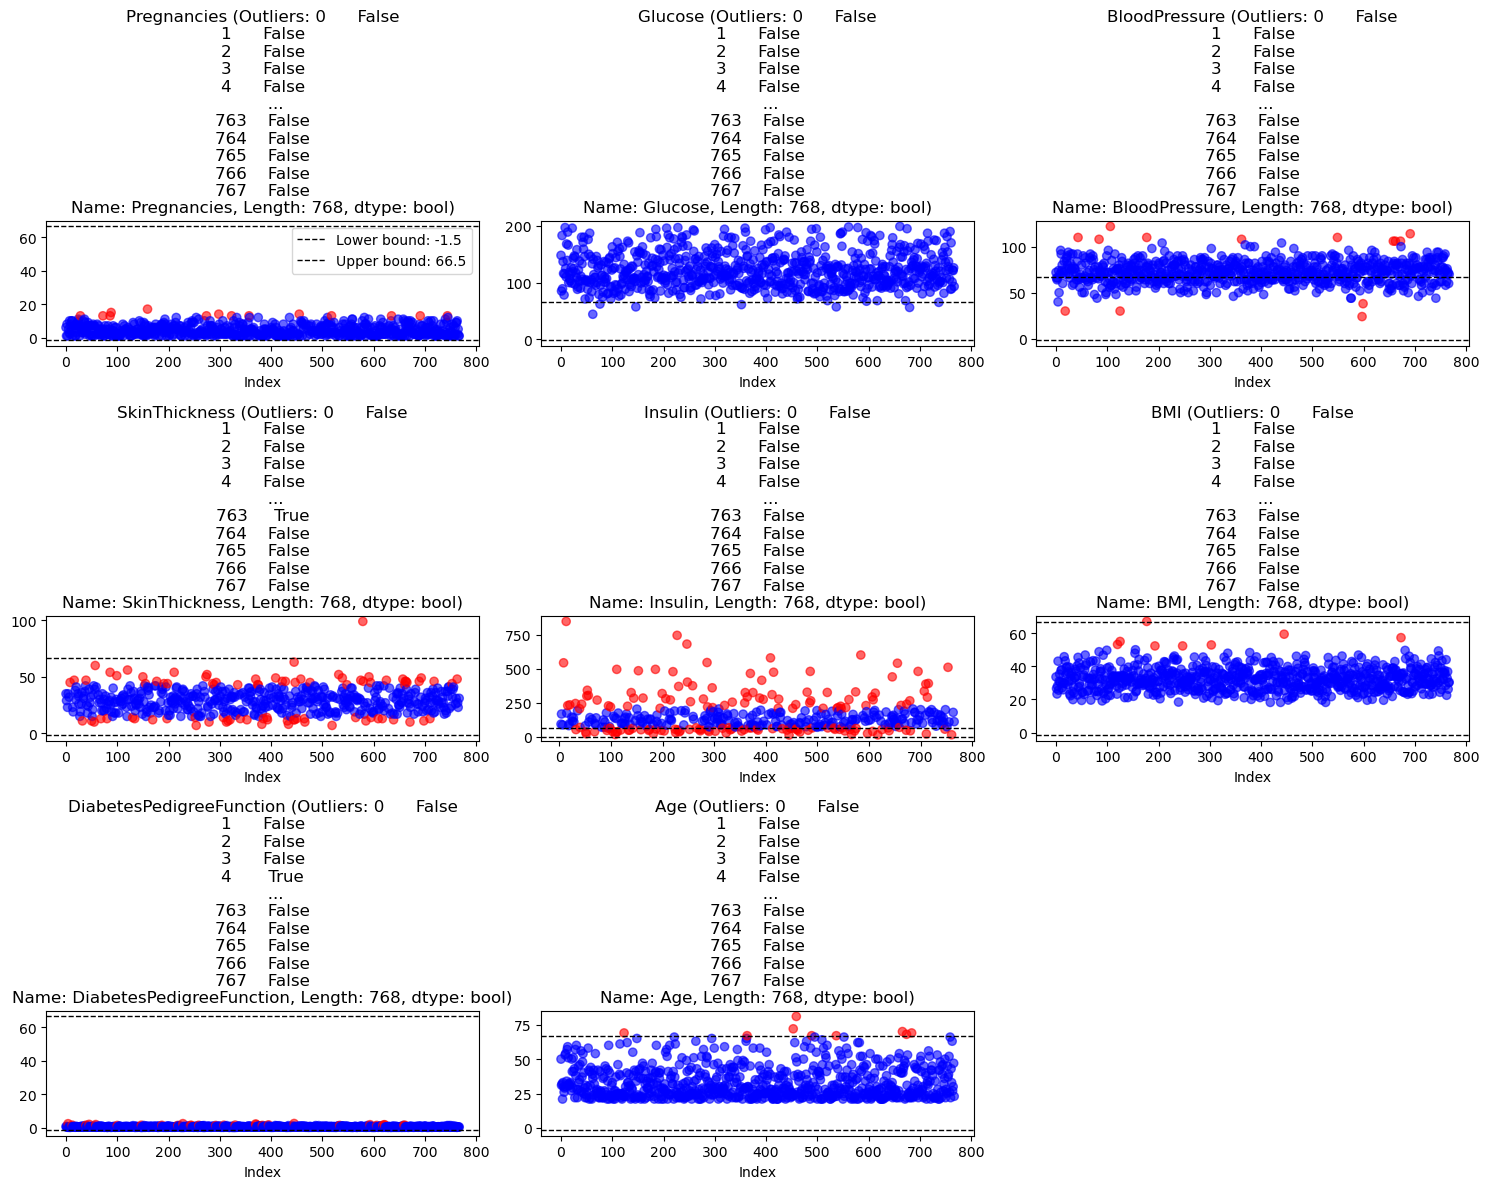

In [44]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(df.columns[:-1]):  # Skip Outcome column
    plt.subplot(3, 3, i+1)
    
    
    # Identify outliers
    detect_outliers(df_imputed[col])
    
    # Plot all points (normal in blue, outliers in red)
    plt.scatter(x=df.index, y=df[col], 
               c=np.where(detect_outliers(df_imputed[col]), 'red', 'blue'), 
               alpha=0.6)
    
    # Add bound lines
    plt.axhline(lower_bound, color='black', linestyle='--', linewidth=1, label=f'Lower bound: {lower_bound:.1f}')
    plt.axhline(upper_bound, color='black', linestyle='--', linewidth=1, label=f'Upper bound: {upper_bound:.1f}')
    
    plt.title(f'{col} (Outliers: {detect_outliers(df_imputed[col])})')
    plt.xlabel('Index')
    
    if i == 0:  # Only show legend in first plot
        plt.legend()

plt.tight_layout()
plt.show()

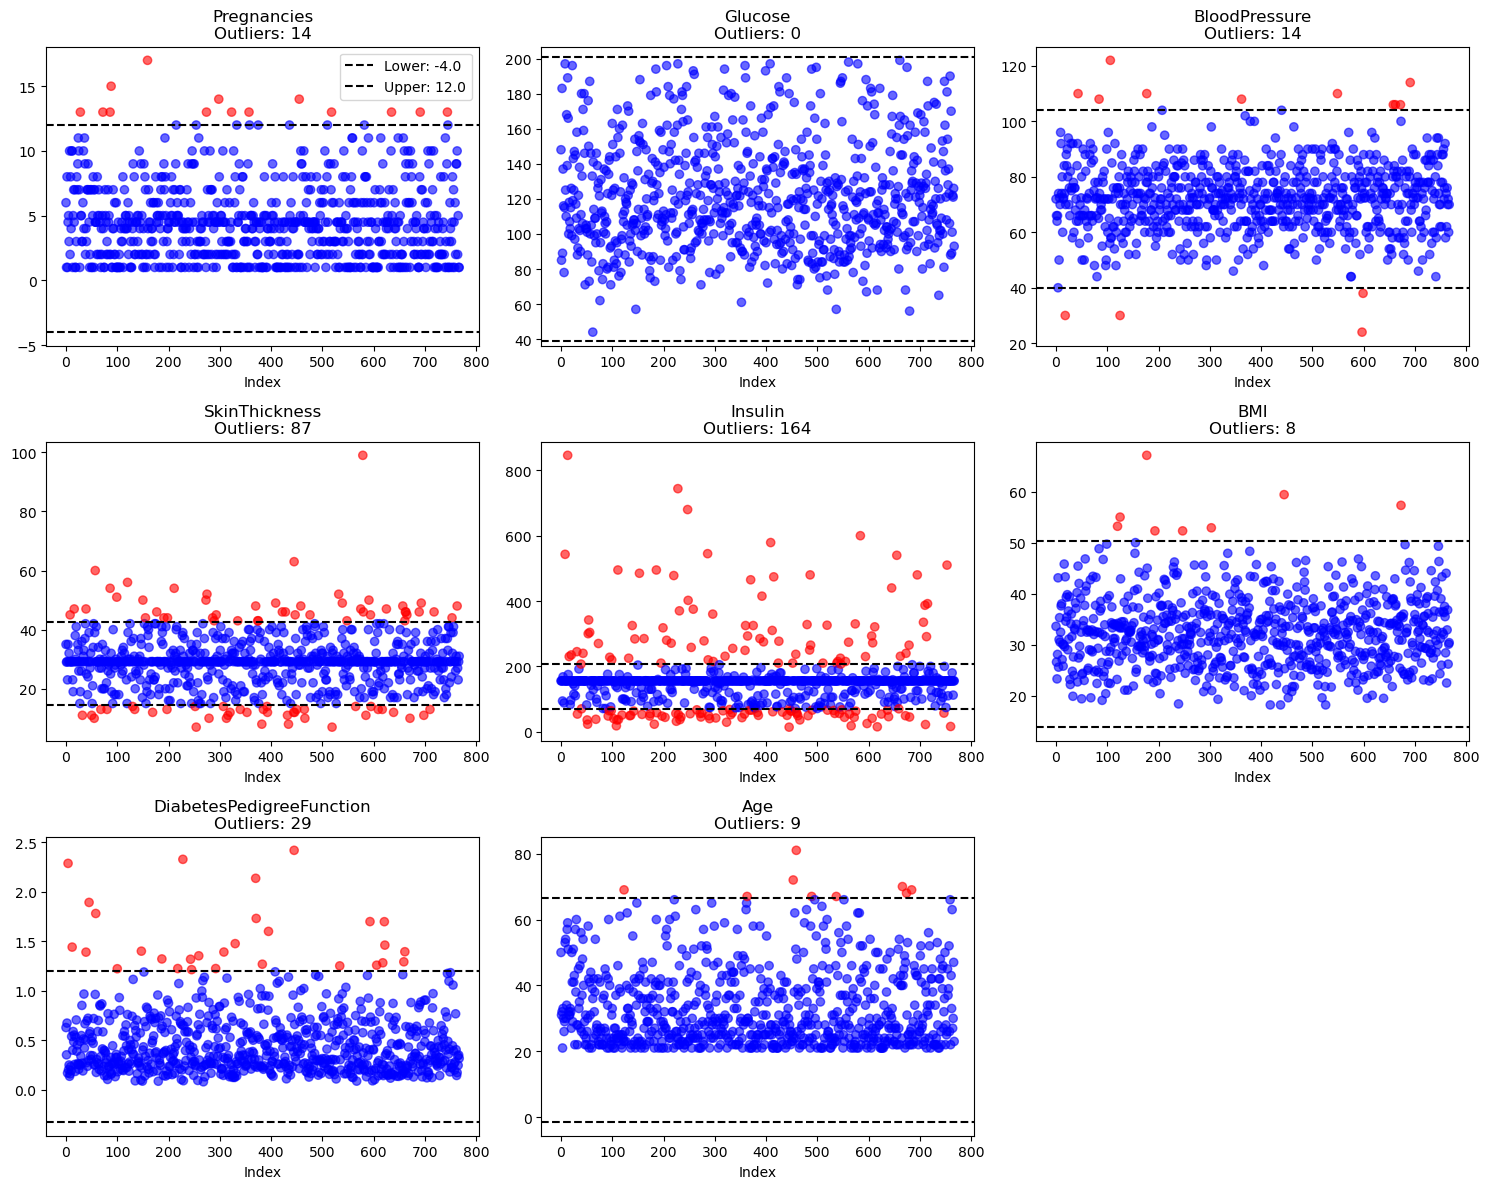


Outlier Statistics:
                 Feature  Outlier_Count  Outlier_Percentage
             Pregnancies             14                1.82
                 Glucose              0                0.00
           BloodPressure             14                1.82
           SkinThickness             87               11.33
                 Insulin            164               21.35
                     BMI              8                1.04
DiabetesPedigreeFunction             29                3.78
                     Age              9                1.17


In [48]:
# Create scatter plots with outlier bounds using your existing function
plt.figure(figsize=(15, 12))
for i, col in enumerate(df_imputed.columns[:-1]):  # Skip Outcome column
    plt.subplot(3, 3, i+1)
    
    # Get outliers using your existing function
    is_outlier = detect_outliers(df_imputed[col])
    
    # Calculate bounds (reusing your function logic)
    Q1 = df_imputed[col].quantile(0.25)
    Q3 = df_imputed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Plot all points (normal in blue, outliers in red)
    plt.scatter(x=df_imputed.index, 
               y=df_imputed[col], 
               c=np.where(is_outlier, 'red', 'blue'),
               alpha=0.6)
    
    # Add bound lines
    plt.axhline(lower_bound, color='black', linestyle='--', 
                label=f'Lower: {lower_bound:.1f}')
    plt.axhline(upper_bound, color='black', linestyle='--', 
                label=f'Upper: {upper_bound:.1f}')
    
    plt.title(f'{col}\nOutliers: {is_outlier.sum()}')
    plt.xlabel('Index')
    
    if i == 0:  # Only show legend in first plot
        plt.legend()

plt.tight_layout()
plt.show()

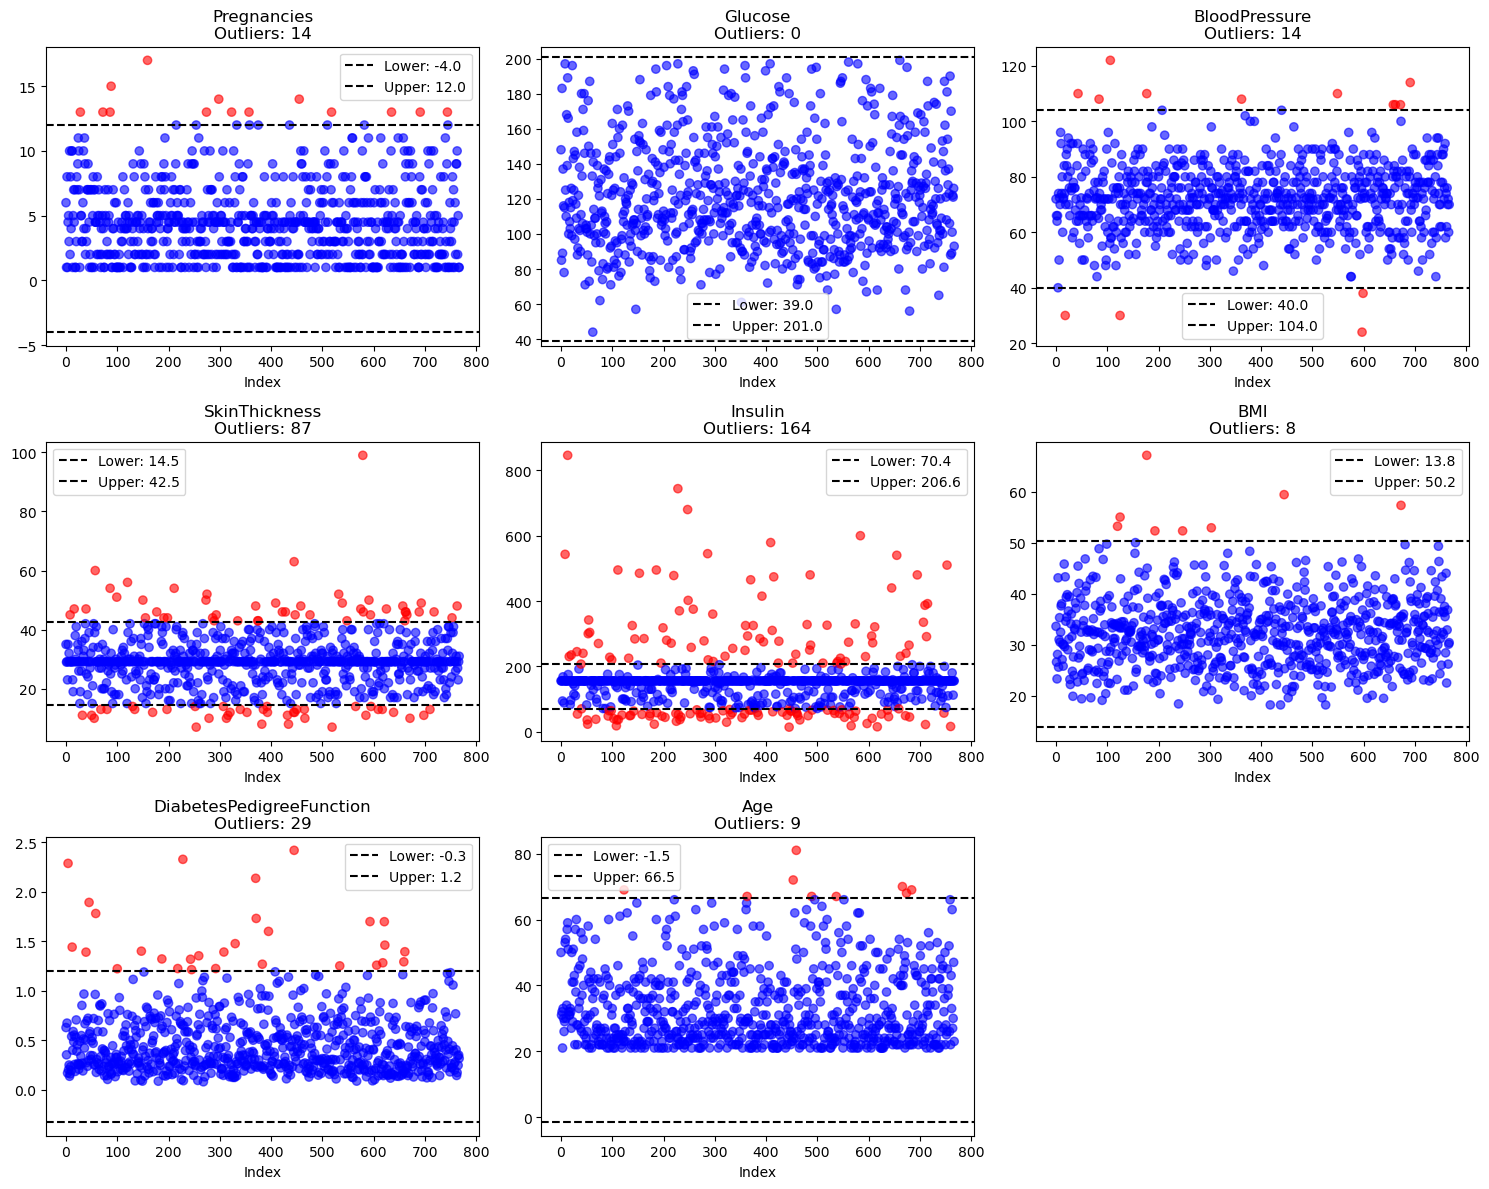

In [54]:
# Create scatter plots with outlier bounds using your existing function
plt.figure(figsize=(15, 12))
for i, col in enumerate(df_imputed.columns[:-1]):  # Skip Outcome column
    plt.subplot(3, 3, i+1)
    
    # Getting outliers using defined function.
    is_outlier = detect_outliers(df_imputed[col])
    
    # Calculating Bounds.
    Q1 = df_imputed[col].quantile(0.25)
    Q3 = df_imputed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Plotting all points (normal in blue and  outliers in red)
    plt.scatter(x=df_imputed.index, 
               y=df_imputed[col], 
               c=np.where(is_outlier, 'red', 'blue'),
               alpha=0.6)
    
    # Adding bound lines
    plt.axhline(lower_bound, color='black', linestyle='--', 
                label=f'Lower: {lower_bound:.1f}')
    plt.axhline(upper_bound, color='black', linestyle='--', 
                label=f'Upper: {upper_bound:.1f}')
    
    plt.title(f'{col}\nOutliers: {is_outlier.sum()}')
    plt.xlabel('Index')
    
    #if i == 0:  # Only showing legend in first plot
    plt.legend()

plt.tight_layout()
plt.show()